<a href="https://colab.research.google.com/github/abhayonkar/Assignment/blob/main/Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("historical_automobile_sales.csv")

df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.columns


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

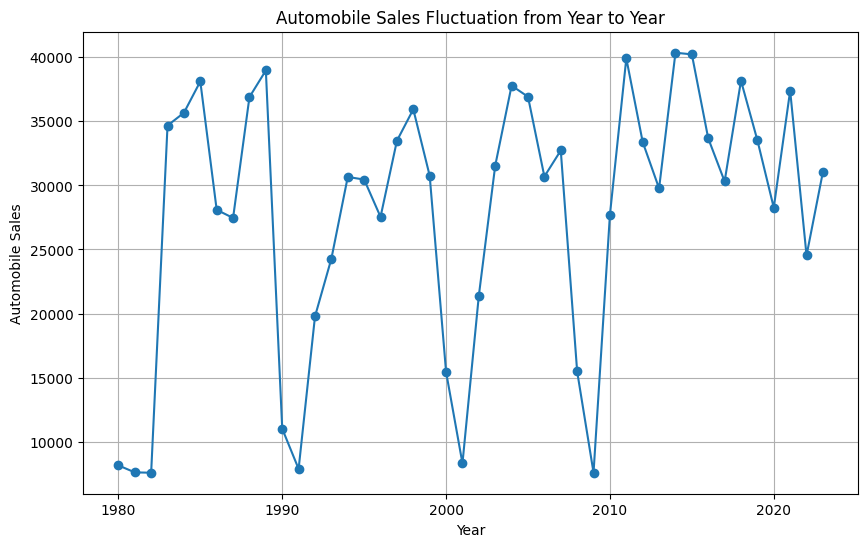

In [43]:
# Remove outliers (assuming outliers are defined as values beyond 1.5 IQR)
Q1 = df['Automobile_Sales'].quantile(0.25)
Q3 = df['Automobile_Sales'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = df[~((df['Automobile_Sales'] < (Q1 - 1.5 * IQR)) | (df['Automobile_Sales'] > (Q3 + 1.5 * IQR)))]

# Group by year and sum the sales
yearly_sales = filtered_data.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Automobile_Sales'], marker='o')
plt.title('Automobile Sales Fluctuation from Year to Year')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

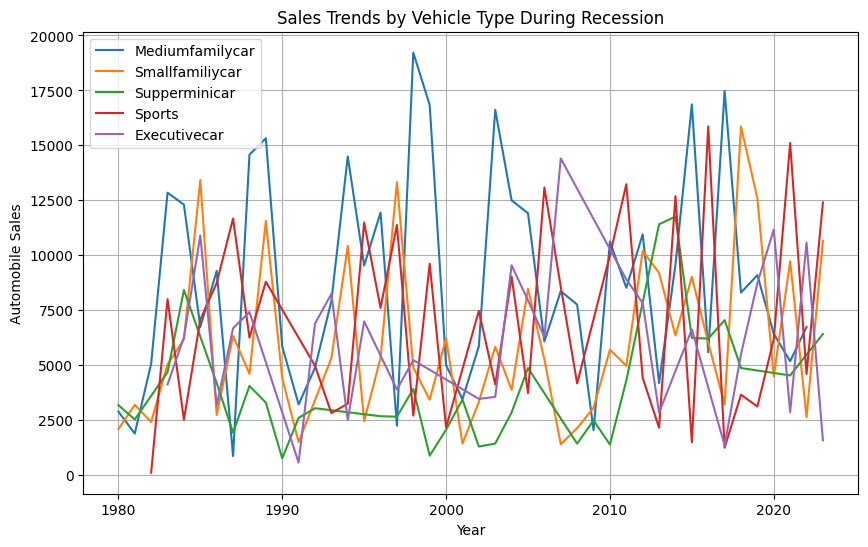

In [45]:
# Group by year and vehicle type, then sum the sales
vehicle_type_sales = filtered_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
for vehicle_type in vehicle_type_sales['Vehicle_Type'].unique():
    subset = vehicle_type_sales[vehicle_type_sales['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=vehicle_type)

plt.title('Sales Trends by Vehicle Type During Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend()
plt.grid(True)
plt.show()


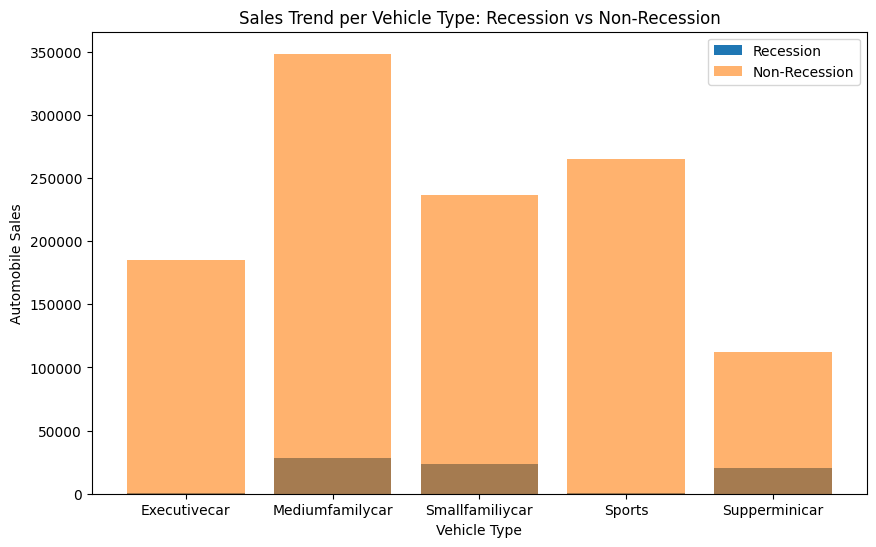

In [ ]:
# Separate data into recession and non-recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]
non_recession_data = filtered_data[filtered_data['Recession'] == 0]

# Group by vehicle type and sum the sales
recession_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
non_recession_sales = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(recession_sales['Vehicle_Type'], recession_sales['Automobile_Sales'], label='Recession')
plt.bar(non_recession_sales['Vehicle_Type'], non_recession_sales['Automobile_Sales'], label='Non-Recession', alpha=0.6)

plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Automobile Sales')
plt.legend()
plt.show()


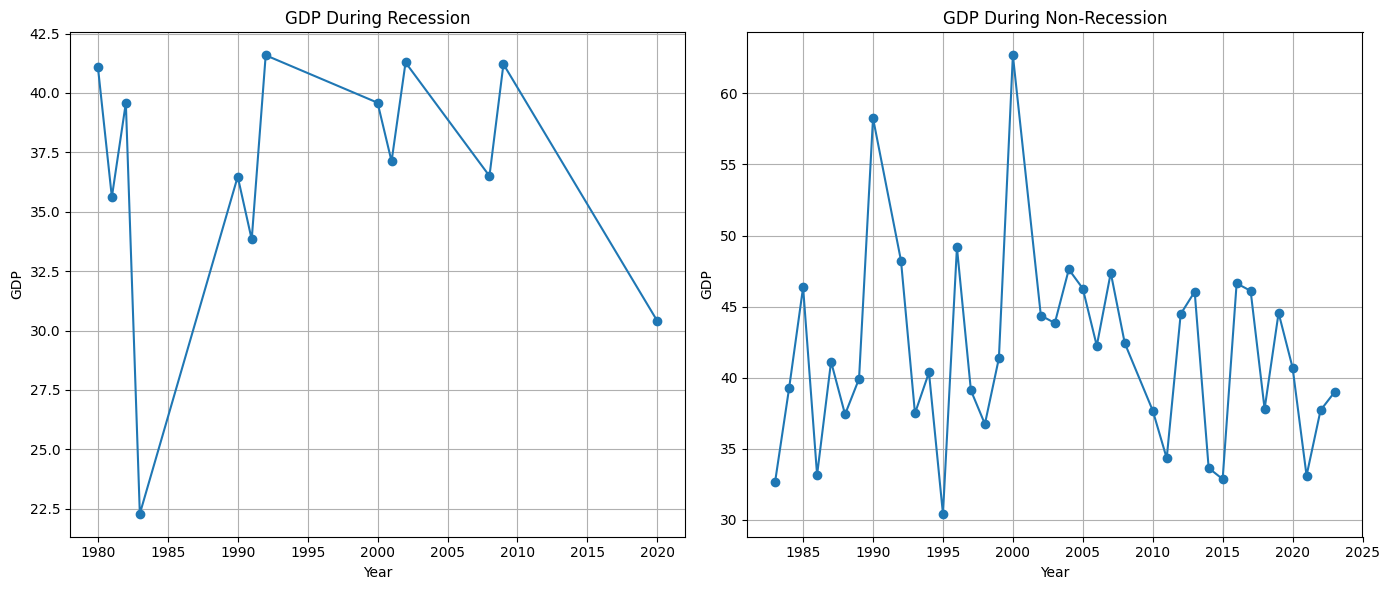

In [ ]:
# Group by year and calculate mean GDP
recession_gdp = recession_data.groupby('Year')['GDP'].mean().reset_index()
non_recession_gdp = non_recession_data.groupby('Year')['GDP'].mean().reset_index()

# Plot the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].plot(recession_gdp['Year'], recession_gdp['GDP'], marker='o')
axes[0].set_title('GDP During Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

axes[1].plot(non_recession_gdp['Year'], non_recession_gdp['GDP'], marker='o')
axes[1].set_title('GDP During Non-Recession')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].grid(True)

plt.tight_layout()
plt.show()


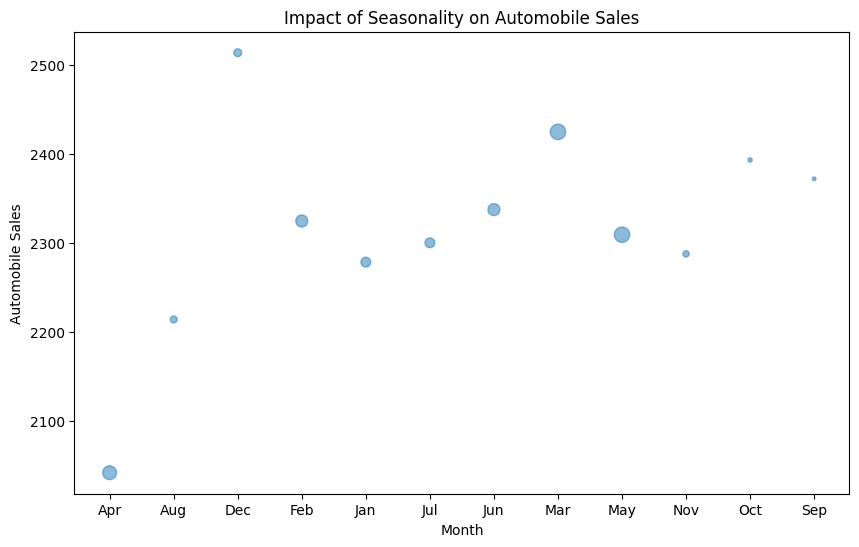

In [ ]:
# Group by month and calculate mean seasonality weight and sales
seasonality_data = filtered_data.groupby('Month').agg({'Seasonality_Weight': 'mean', 'Automobile_Sales': 'mean'}).reset_index()

# Plot the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(seasonality_data['Month'], seasonality_data['Automobile_Sales'], s=seasonality_data['Seasonality_Weight']*100, alpha=0.5)

plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()


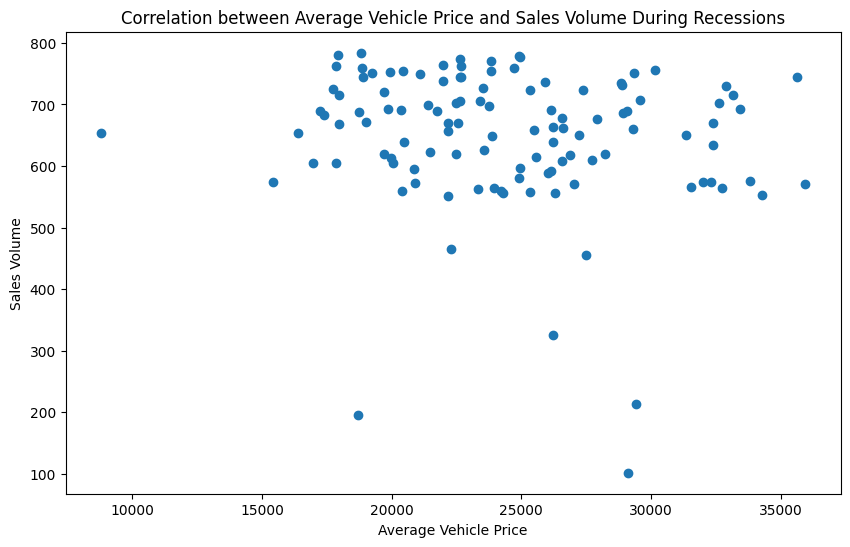

In [ ]:
# Filter data for recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

plt.title('Correlation between Average Vehicle Price and Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.show()


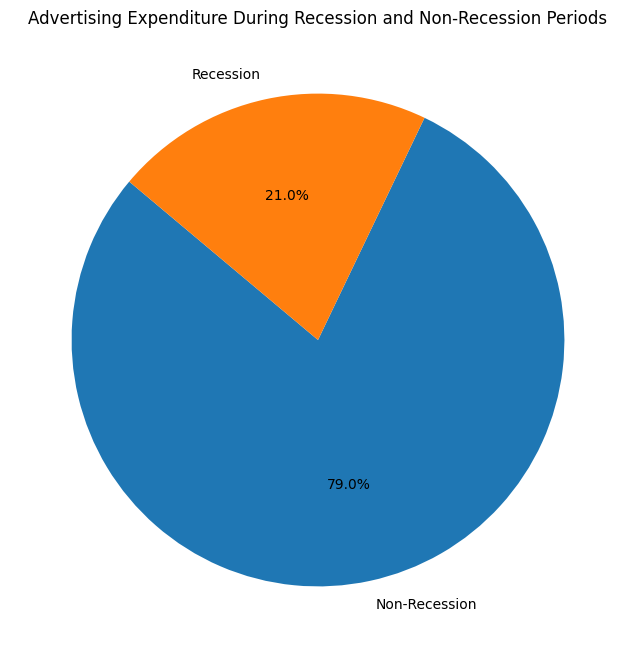

In [ ]:
# Group by recession and sum the advertising expenditure
ad_expenditure = filtered_data.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure['Advertising_Expenditure'], labels=['Non-Recession', 'Recession'], autopct='%1.1f%%', startangle=140)

plt.title('Advertising Expenditure During Recession and Non-Recession Periods')
plt.show()


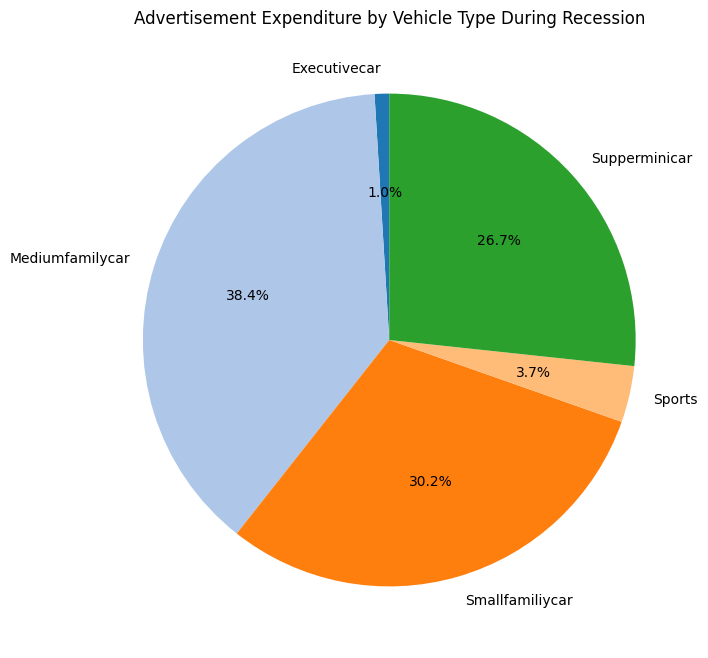

In [ ]:
# Filter data for recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]

# Group by vehicle type and sum the advertising expenditure
ad_expenditure_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure_vehicle['Advertising_Expenditure'], labels=ad_expenditure_vehicle['Vehicle_Type'], autopct='%1.1f%%', startangle=140)

plt.title('Advertising Expenditure by Vehicle Type During Recession')
plt.show()


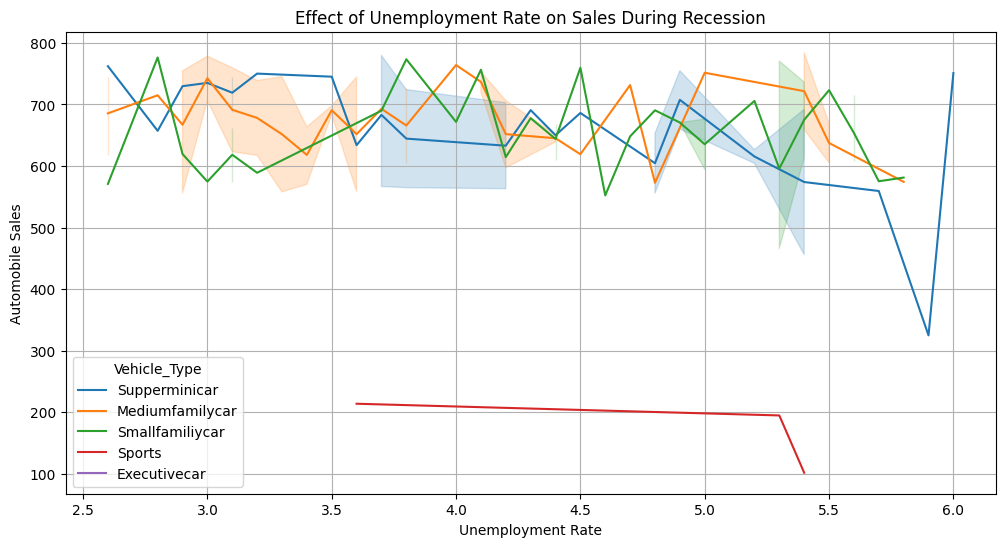

In [ ]:

# TASK 1.9: Line plot (Unemployment rate impact on sales during recession)
plt.figure(figsize=(12, 6))
recession_data = df[df['Recession'] == 1]
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv("historical_automobile_sales.csv")

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Analysis Dashboard"

# App layout
app.layout = html.Div([
    html.H1("Automobile Sales Analysis Dashboard", style={"textAlign": "center"}),

    # Dropdowns for filtering
    html.Div([
        html.Label("Select a Report Type:"),
        dcc.Dropdown(
            id="report-type-dropdown",
            options=[
                {"label": "Recession Report", "value": "Recession"},
                {"label": "Yearly Report", "value": "Yearly"}
            ],
            value="Recession",
            placeholder="Select a report type"
        ),

        html.Label("Select a Year:"),
        dcc.Dropdown(
            id="year-dropdown",
            options=[{"label": year, "value": year} for year in sorted(data["Year"].unique())],
            value=data["Year"].min(),
            placeholder="Select a year"
        )
    ], style={"width": "50%", "margin": "auto"}),

    # Output container
    html.Div(id="output-container", className="output-container"),

    # Graph display area
    html.Div([
        dcc.Graph(id="report-graph")
    ])
])

# Callback to update output and graph
@app.callback(
    [Output("output-container", "children"),
     Output("report-graph", "figure")],
    [Input("report-type-dropdown", "value"),
     Input("year-dropdown", "value")]
)
def update_report(report_type, selected_year):
    if report_type == "Recession":
        filtered_data = data[data["Recession"] == 1]  # Filter for recession years
        title = f"Recession Report Statistics for {selected_year}"
        figure = px.bar(
            filtered_data[filtered_data["Year"] == selected_year],
            x="Month",
            y="Automobile_Sales",
            title=title
        )
    else:  # Yearly Report
        filtered_data = data[data["Year"] == selected_year]
        title = f"Yearly Report Statistics for {selected_year}"
        figure = px.line(
            filtered_data,
            x="Month",
            y="Automobile_Sales",
            title=title
        )

    return f"Displaying {report_type} Report for {selected_year}", figure

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>